In [ ]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Save data in a variable
data = pd.read_csv('Global Population Trends(2016-2022).csv')

In [ ]:
data = data.replace("-", np.nan)
data["Total Population"] = data["Total Population"].str.replace(',', '').astype(float)
data["Urban Population"] = data["Urban Population"].str.replace(",", "").astype(float)
data["Rural Population"] = data["Rural Population"].str.replace(",", "").astype(float)
data["Population Density"] = data["Population Density"].str.replace(",", "").astype(float)
data["Fertility Rate"] = data["Fertility Rate"].str.replace(",", "").astype(float)
data["Infant Mortality Rate"] = data["Infant Mortality Rate"].str.replace(",", "").astype(float)
data["Growth Rate"] = data["Growth Rate"].str.replace(",", "").astype(float)
data["Life Expectancy"] = data["Life Expectancy"].str.replace(",", "").astype(float)

In [ ]:
aux_country = data["Country"]
aux_year = data["Year"]
data = data.drop(["Country","Year"], axis=1)

# Scaling data
mms = MinMaxScaler(feature_range=(0, 10))
scaled_data = mms.fit_transform(data)
data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)
data["Country"] = aux_country
data["Year"] = aux_year

In [6]:
# Save data of interest in data_countries variable 
data_countries = []

countries_to_study = ['Spain', 'United Kingdom', 'France', 'Ireland', 'Portugal', 'Afghanistan']
for country in countries_to_study:
    data_countries.append(data.loc[data['Country'] == country])

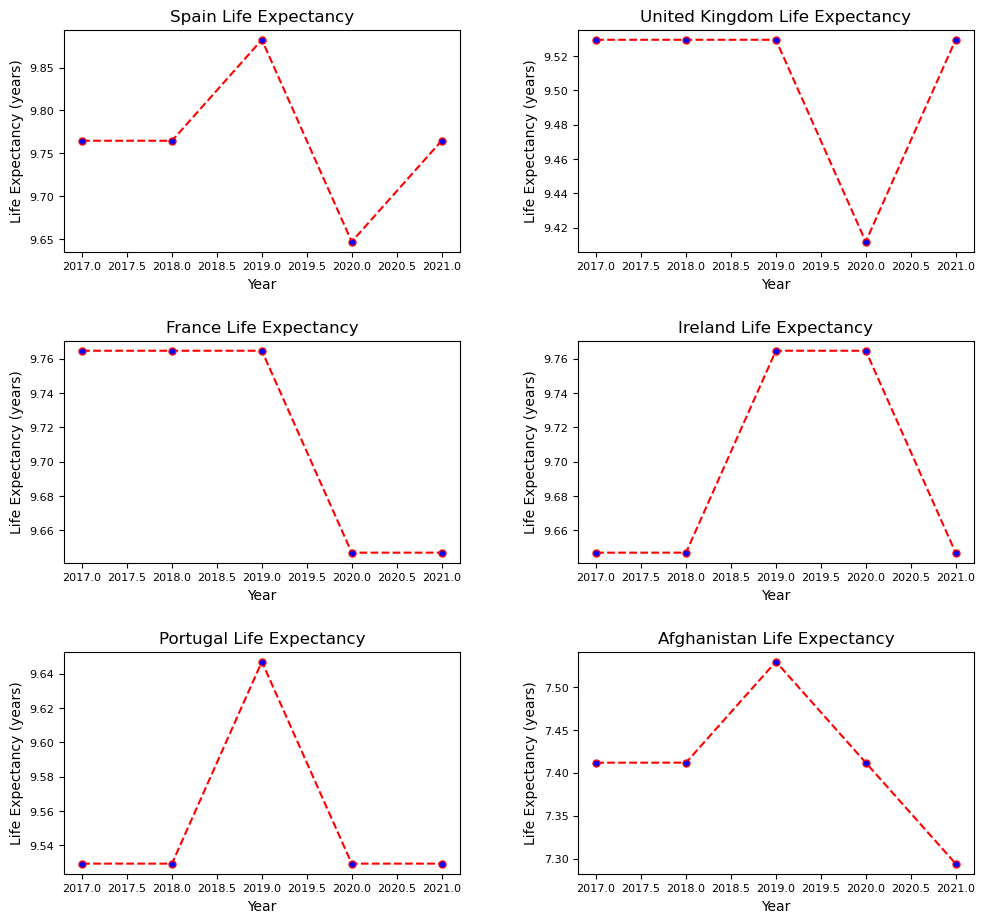

In [7]:
plt.figure(1, figsize=(25, 15))  # Set the width and height as desired (in inches)

count = 0

for idx, data_country in enumerate(data_countries):
    plt.subplot2grid((4,4), (count,idx%2))
    plt.plot(data_country["Year"], data_country["Life Expectancy"], color='r', linestyle='dashed', marker='o',
     markerfacecolor='blue', markersize=5)
    plt.title(data_country["Country"].tolist()[0] + " Life Expectancy", fontsize=12)
    
    plt.xlabel("Year", fontsize=10)
    plt.ylabel("Life Expectancy (years)", fontsize=10)
    plt.xticks(fontsize=8)  # X-axis tick label font size
    plt.yticks(fontsize=8)  # Y-axis tick label font size
    if ( idx % 2 != 0 ):
        count = count + 1

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)

plt.show()

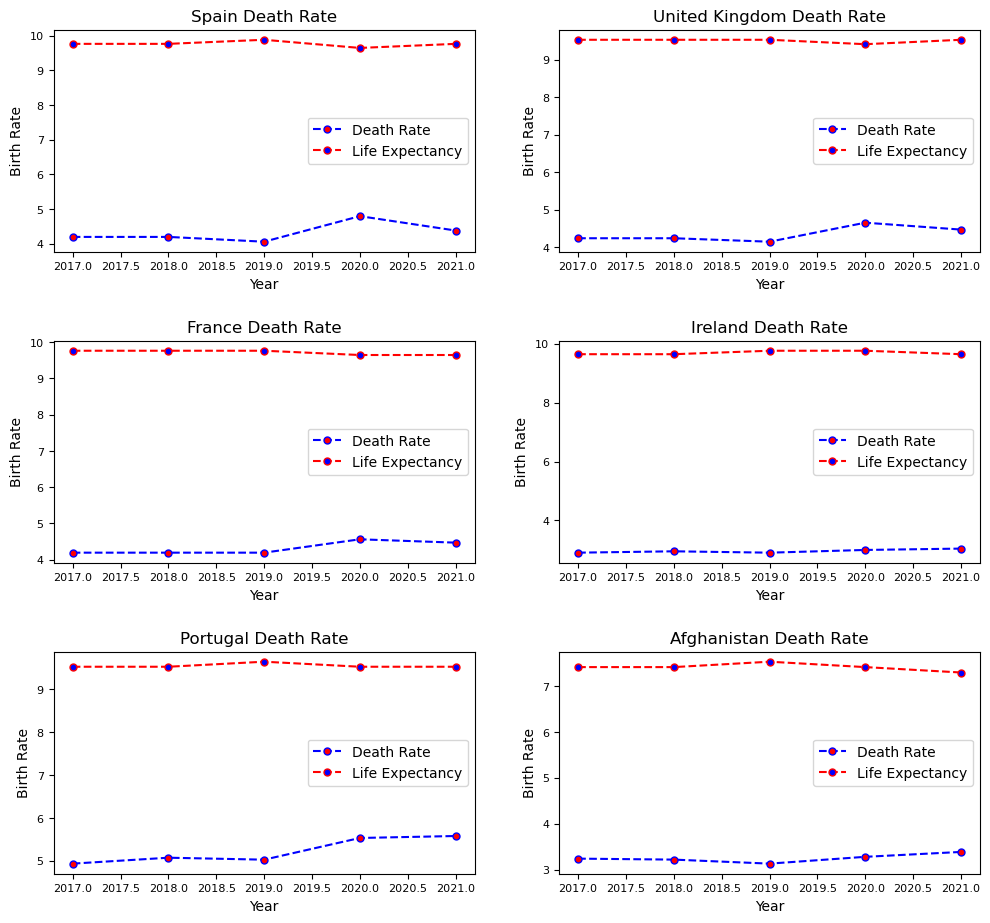

In [10]:
plt.figure(1, figsize=(25, 15))  # Set the width and height as desired (in inches)

count = 0

for idx, data_country in enumerate(data_countries):
    plt.subplot2grid((4,4), (count,idx%2))
    plt.plot(data_country["Year"], data_country["Death Rate"], color='b', linestyle='dashed', marker='o',
     markerfacecolor='r', markersize=5, label="Death Rate")
    plt.plot(data_country["Year"], data_country["Life Expectancy"], color='r', linestyle='dashed', marker='o',
     markerfacecolor='b', markersize=5, label="Life Expectancy")
    plt.title(data_country["Country"].tolist()[0] + " Death Rate", fontsize=12)
    
    plt.xlabel("Year", fontsize=10)
    plt.ylabel("Birth Rate", fontsize=10)
    plt.xticks(fontsize=8)  # X-axis tick label font size
    plt.yticks(fontsize=8)  # Y-axis tick label font size
    count += 1 if idx % 2 != 0 else 0
        
    # Add legend
    plt.legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.show()

In [11]:
data.head()

,Total Population,Urban Population,Rural Population,Population Density,Life Expectancy,Birth Rate,Death Rate,Fertility Rate,Infant Mortality Rate,Growth Rate,Country,Year
0,NaN,NaN,NaN,0.026526,7.411765,8.056353,3.238249,7.240260,5.588915,NaN,Afghanistan,2017
1,0.259680,0.105878,0.300563,0.027009,7.411765,7.966818,3.217051,7.060982,5.404157,7.777778,Afghanistan,2018
2,0.267346,0.110112,0.308358,0.027973,7.529412,7.867360,3.129493,6.874647,5.230947,7.777778,Afghanistan,2019
3,0.275862,0.114821,0.317011,0.028938,7.411765,7.777826,3.277880,6.705251,5.057737,7.777778,Afghanistan,2020
4,0.283843,0.119452,0.324911,NaN,7.294118,7.732735,3.384332,6.554207,4.896074,7.777778,Afghanistan,2021
